## Team ID : PTID-CDS-JAN-23-1445
## Project ID : PRCP-1002-HandwrittenDigits

__Problem Statement :__ <br>
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.<br>
Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.


__Tasks :__ <br>
1. Prepare a complete data analysis report on the given data.

2. Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

3. Compare between various models and find the classifier that works better.

## Libraries we needed : 

In [ ]:
## Basic Libraies ::

import numpy as np, pandas as pd 
import matplotlib.pyplot as plt, seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
## Tensorflow Libraries:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

## For importing the MNIST dataset:
from keras.datasets import mnist

## For prediction evaluation:
from sklearn.metrics import *

__Load the dataset and splitting into train data and test data__

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


**The shape of the dataset**

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### Data Exploration

__Defining a function to visualize the images for train and test set__

In [ ]:
def plot_images_sample(X, Y):
    plt.figure(figsize=(22,4))
    rand_indicies = np.random.randint(len(X), size=20) # returns 20 random indexes 
    for i in range(20):
        plt.subplot(2,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap="binary")
        plt.title(Y[index])
    plt.show()

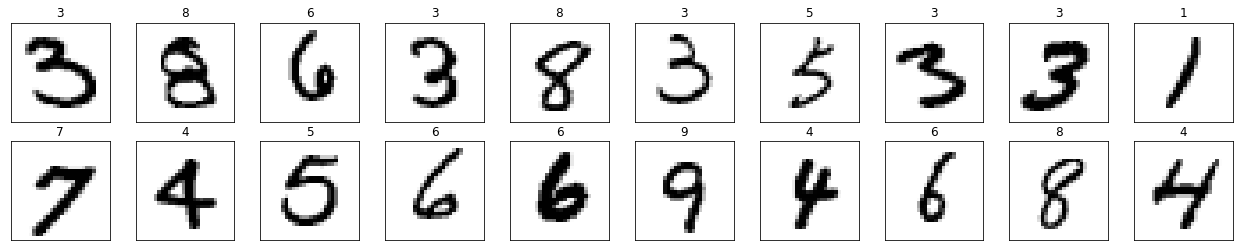

In [ ]:
# Calling the function for train:
plot_images_sample(X_train, y_train)

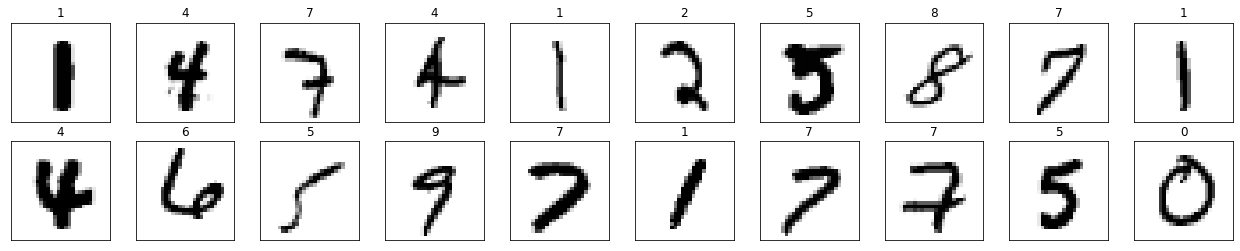

In [ ]:
# Calling the function for test:
plot_images_sample(X_test, y_test)

# 1. ANN :

In [ ]:
## Separating the train and test data for ann purpose
X_train_ann = X_train.copy()
X_test_ann = X_test.copy()
y_train_ann = y_train.copy()
y_test_ann = y_test.copy()

__Scaling the features for both train and test__

In [ ]:
X_train_ann = X_train_ann.astype('float32') / 255
X_test_ann = X_test_ann.astype('float32') / 255

## Model creation:

In [ ]:
## Creating a object of Sequential() class
model = Sequential()

In [ ]:
## Defining the layers of the ANN
model.add(Flatten(input_shape = (28, 28)))

model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [ ]:
## Returns the summary of the above Neural Network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Compiling the created Neural Network
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [ ]:
## Fitting the training set to the Neural Network
history = model.fit(X_train_ann, y_train_ann, epochs = 20, validation_split = 0.2)

Epoch 1/100
1500/1500 [==============================] - 7s 3ms/step - loss: 0.3807 - accuracy: 0.8881 - val_loss: 0.1453 - val_accuracy: 0.9571
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1635 - accuracy: 0.9523 - val_loss: 0.1178 - val_accuracy: 0.9662
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1215 - accuracy: 0.9646 - val_loss: 0.1057 - val_accuracy: 0.9690
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0950 - accuracy: 0.9724 - val_loss: 0.0938 - val_accuracy: 0.9715
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0976 - val_accuracy: 0.9709
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.0872 - val_accuracy: 0.9746
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0585 - accuracy: 0.9815 - val_loss: 0.0814 - val_ac

In [ ]:
## Predict the testing set using the trained neural network
y_pred = model.predict(X_test_ann)

313/313 [==============================] - 1s 2ms/step


In [ ]:
## Taking the index with maximum probabilty
y_pred_index = y_pred.argmax(axis = 1)

In [ ]:
print(y_pred_index)
print(y_test_ann)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
## Accuracy score for the testing set
print(accuracy_score(y_test_ann, y_pred_index))

0.9781


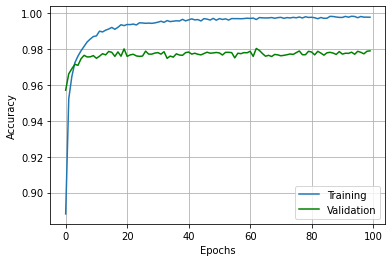

In [ ]:
## Plotting Training and Validation "accuracy curve"::

plt.plot(history.history["accuracy"], label = "Training")
plt.plot(history.history["val_accuracy"], label = "Validation", color = "g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "best")
plt.grid()
plt.show()

**Plotting the actual and predicted labels with thw help of visualization**

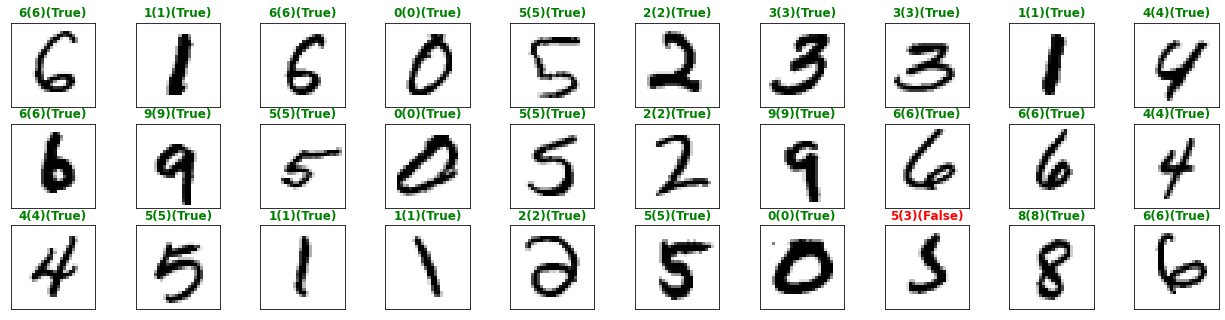

CPU times: user 1 s, sys: 3.29 ms, total: 1 s
Wall time: 1 s


In [ ]:
%%time
plt.figure(figsize=(22,9))
rand_indicies = np.random.randint(len(X_test_ann), size=50)
for i in range(30):
  y_pred_index = y_pred[rand_indicies[i]].argmax()
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(X_test_ann[rand_indicies[i]]), cmap="binary")
  plt.title(f"{y_test_ann[rand_indicies[i]]}({y_pred_index}){'(True)' if y_test_ann[rand_indicies[i]] == y_pred_index else '(False)'}", color = 'g' if y_test_ann[rand_indicies[i]] == y_pred_index else "r", fontweight="bold")
plt.show()

# 2. CNN

In [ ]:
## importing Libraries for CNN

from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical # For one hot encoding the target labels
from keras import callbacks
from keras.callbacks import ModelCheckpoint # Saving the best model

In [ ]:
## Separating the train and test data for cnn purpose
X_train_cnn = X_train.copy()
X_test_cnn = X_test.copy()
y_train_cnn = y_train.copy()
y_test_cnn = y_test.copy()

__Expanding the dimension:__<br>
<p>
(batch size, height, width, channels)<br>
Use of np.expand_dims() is to add a channel dimension to the input tensor. When using grayscale images, the input data only has one channel, but a CNN expects data with multiple channels.<br> 
np.expand_dims() can be used to add a channel dimension to the input data, so that it can be used as input for the CNN.
</p>

In [ ]:
X_train_cnn = np.expand_dims(X_train_cnn, axis = -1)
X_test_cnn = np.expand_dims(X_test_cnn, axis = -1)

__Scaling the features for both train and test__

In [ ]:
X_train_cnn = X_train_cnn.astype('float32') / 255
X_test_cnn = X_test_cnn.astype('float32') / 255

__One Hot Encoding the target labels__

In [ ]:
no_of_classes = len(np.unique(y_train)) # total number of classes are there in the target

y_train_cnn = to_categorical(y_train_cnn, no_of_classes)
y_test_cnn = to_categorical(y_test_cnn, no_of_classes)

In [ ]:
## After encoding we can see the shape which has with 10 columns(10 labels)
y_train_cnn.shape, y_test_cnn.shape

((60000, 10), (10000, 10))

## Model creation:

In [ ]:
sequence = Sequential()

In [ ]:
# Convolution + Relu layer:
sequence.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same", activation = "relu", input_shape = X_train_cnn.shape[1:]))
# Maxpool layer:
sequence.add(MaxPooling2D(pool_size = 2))

# Convolution + Relu layer:
sequence.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu"))
# Maxpool layer:
sequence.add(MaxPooling2D(pool_size = 2))

# Dropout layer:
sequence.add(Dropout(0.3))

# Flattening the inputs:
sequence.add(Flatten())

# Adding Hidden layer:
sequence.add(Dense(128, activation = "relu")) # "relu" used in hidden layer

# Dropout layer:
sequence.add(Dropout(0.4))

# Adding output layer:
sequence.add(Dense(no_of_classes, activation = "softmax")) # "softmax" used in output and since it is a multi class classification

In [ ]:
sequence.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

In [ ]:
sequence.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
# Save the best model with minimum loss & higher accuracy:
check_point = ModelCheckpoint(filepath = "model.weights.best.hdf5", verbose = 3, save_best_only = True)

In [ ]:
history = sequence.fit(X_train_cnn, y_train_cnn, batch_size = 32, epochs = 10, validation_split = 0.2, callbacks = [check_point], verbose = 3, shuffle = True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.06863, saving model to model.weights.best.hdf5
Epoch 2/10

Epoch 2: val_loss improved from 0.06863 to 0.05278, saving model to model.weights.best.hdf5
Epoch 3/10

Epoch 3: val_loss improved from 0.05278 to 0.04137, saving model to model.weights.best.hdf5
Epoch 4/10

Epoch 4: val_loss improved from 0.04137 to 0.03624, saving model to model.weights.best.hdf5
Epoch 5/10

Epoch 5: val_loss improved from 0.03624 to 0.03376, saving model to model.weights.best.hdf5
Epoch 6/10

Epoch 6: val_loss did not improve from 0.03376
Epoch 7/10

Epoch 7: val_loss improved from 0.03376 to 0.03077, saving model to model.weights.best.hdf5
Epoch 8/10

Epoch 8: val_loss did not improve from 0.03077
Epoch 9/10

Epoch 9: val_loss did not improve from 0.03077
Epoch 10/10

Epoch 10: val_loss did not improve from 0.03077


In [ ]:
y_pred = sequence.predict(X_test_cnn)

313/313 [==============================] - 1s 2ms/step


In [ ]:
## Accuracy for test data
score = sequence.evaluate(X_test_cnn, y_test_cnn, verbose = 0)
print(score[1] * 100)

99.07000064849854


In [ ]:
y_pred_index = y_pred.argmax(axis = 1)

In [ ]:
print(y_pred_index)
print(y_test_cnn.argmax(axis = 1))

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [ ]:
## Accuracy
print(accuracy_score(y_test_cnn.argmax(axis = 1), y_pred_index))

0.9907


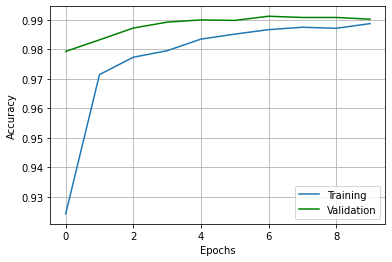

In [ ]:
## Accuracy curve
plt.plot(history.history["accuracy"], label = "Training")
plt.plot(history.history["val_accuracy"], label = "Validation", color = "g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "best")
plt.grid()
plt.show()

**Plotting the actual and predicted labels with thw help of visualization**

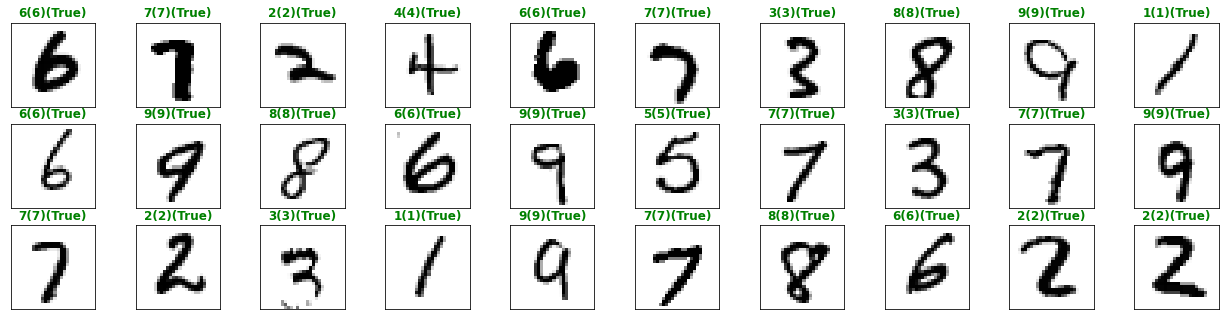

CPU times: user 814 ms, sys: 2.61 ms, total: 817 ms
Wall time: 815 ms


In [ ]:
%%time

y_test_max = y_test_cnn.argmax(axis = 1)

plt.figure(figsize=(22,9))
rand_indicies = np.random.randint(len(X_test_cnn), size=50)
for i in range(30):
  y_pred_index = y_pred[rand_indicies[i]].argmax()
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(X_test_cnn[rand_indicies[i]]), cmap="binary")
  plt.title(f"{y_test_max[rand_indicies[i]]}({y_pred_index}){'(True)' if y_test_max[rand_indicies[i]] == y_pred_index else '(False)'}", color = 'g' if y_test_max[rand_indicies[i]] == y_pred_index else "r", fontweight="bold")
plt.show()

# 3. KNN

In [ ]:
## Library for K-Neighbours-Classifier:
from sklearn.neighbors import KNeighborsClassifier

**Reshaping the input**

In [ ]:
## Separating the train and test data for knn purpose
x_train_knn = X_train.copy()
x_test_knn = X_test.copy()
y_train_knn = y_train.copy()
y_test_knn = y_test.copy()

In [ ]:
x_train_knn = np.reshape(x_train_knn,(60000,784))
x_test_knn = np.reshape(x_test_knn,(10000,784))

In [ ]:
print(x_train_knn.shape, y_train_knn.shape)
print(x_test_knn.shape, y_test_knn.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


**Scale the data**

In [ ]:
x_train_knn = x_train_knn.astype('float32') / 255
x_test_knn = x_test_knn.astype('float32') / 255

<b>
Taking optimal k to determine how many nearest neighbors  to create<br>
create a list to store the error values for each k
</b>

In [ ]:
error =  []

for k in range(3, 20):
    model  = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_knn, y_train_knn)
    predictions = model.predict(x_test_knn)
    e  = 1 - accuracy_score(y_test_knn, predictions)
    error.append(e)

In [ ]:
print(error)

[0.02949999999999997,
 0.03180000000000005,
 0.031200000000000006,
 0.032299999999999995,
 0.03059999999999996,
 0.03300000000000003,
 0.03410000000000002,
 0.033499999999999974,
 0.03320000000000001,
 0.03390000000000004,
 0.03469999999999995,
 0.03600000000000003,
 0.036699999999999955,
 0.036800000000000055,
 0.03700000000000003,
 0.036699999999999955,
 0.036800000000000055]

__Plot the k-value and error rate__

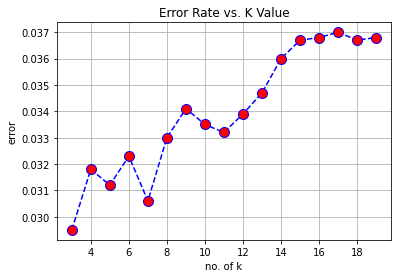

In [ ]:
plt.plot(range(3, 20) ,  error,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel("no. of k")
plt.ylabel("error")
plt.grid()
plt.show()

**Modelling the data**

In [ ]:
## let's fit the data into KNN model and see how well it performs:

model_knn  = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model_knn.fit(x_train_knn,y_train_knn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [ ]:
# predict the model

prediction_train = model_knn.predict(x_train_knn)
prediction_test  =  model_knn.predict(x_test_knn)

In [ ]:
# Checking Accuracy score

print('accuracy_score for training data:',accuracy_score(y_train_knn, prediction_train)*100)

print('\naccuracy_score for test data:\t',accuracy_score(y_test_knn, prediction_test)*100)

accuracy_score for training data: 98.67166666666667

accuracy_score for test data:	 97.05


# 4. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## Separating the train and test data for random forest purpose
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()

__Converting X_train_rf and X_test_rf to pandas dataframe__

In [ ]:
X_train_rf = pd.DataFrame(X_train_rf.reshape(60000, 784), columns=['pixel_' + str(i) for i in range(X_train_rf.shape[1] * X_train_rf.shape[2])])
X_test_rf = pd.DataFrame(X_test_rf.reshape(10000, 784), columns=['pixel_' + str(i) for i in range(X_test_rf.shape[1] * X_test_rf.shape[2])])

__Converting y_train_rf and y_test_rf to pandas series__

In [ ]:
y_train_rf = pd.Series(y_train_rf)
y_test_rf = pd.Series(y_test_rf)

In [ ]:
X_train_rf.sample(2)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
38637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_rf.sample(2)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
3516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Model Creation__

In [ ]:
rfc = RandomForestClassifier(n_estimators = 300, max_depth = 20, criterion = "gini", min_samples_split = 2, n_jobs = -1)

In [ ]:
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1)

In [ ]:
y_hat_rf = rfc.predict(X_test_rf)

In [ ]:
## Training and Testing Scores:

print(f"Train score: {rfc.score(X_train_rf, y_train_rf)}")
print(f"Test score: {rfc.score(X_test_rf, y_test_rf)}")

Train score: 0.9993
Test score: 0.9695


# 5. MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()

mlp.fit(X_train_rf, y_train_rf)

MLPClassifier()

In [ ]:
y_hat_mlp = mlp.predict(X_test_rf)

In [ ]:
## Training and Testing Scores:

print(f"Train score: {mlp.score(X_train_rf, y_train_rf)}")
print(f"Test score: {mlp.score(X_test_rf, y_test_rf)}")

Train score: 0.9931333333333333
Test score: 0.9634


# 6. SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
## Separating the train and test data for SVM purpose
X_train_svm = X_train.copy()
X_test_svm = X_test.copy()
y_train_svm = y_train.copy()
y_test_svm = y_test.copy()

In [ ]:
# reshape to be [samples][width][height][channels]
X_train_svm = X_train_svm.reshape((X_train_svm.shape[0], 28 * 28))
X_test_svm = X_test_svm.reshape((X_test_svm.shape[0], 28 * 28))

In [ ]:
# convert data type and normalize values
X_train_svm = X_train_svm.astype('float32')
X_test_svm = X_test_svm.astype('float32')
X_train_svm /= 255
X_test_svm /= 255

In [ ]:
# initializing the model
clf_svm = SVC()

In [ ]:
#fitting the model with training data
clf_svm.fit(X_train_svm, y_train_svm)

SVC()


In [ ]:
# make predictions on the testing set
y_predict_train = clf_svm.predict(X_train_svm)
y_predict_test = clf_svm.predict(X_test_svm)

In [ ]:
# evaluate the model

print("Accuracy train:",accuracy_score(y_train_svm, y_predict_train))
print("Accuracy test:",accuracy_score(y_test_svm, y_predict_test))

SVM Training Accuracy:	 98.99166666666666
SVM Test Accuracy:	 97.92


# 7. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
## Separating the train and test data for Naive Bayes purpose
X_train_nb = X_train.copy()
X_test_nb = X_test.copy()
y_train_nb = y_train.copy()
y_test_nb = y_test.copy()

In [ ]:
clf_nb = MultinomialNB()

In [ ]:
# fit the classifier to the training data
clf_nb.fit(X_train_nb, y_train_nb)

MultinomialNB()


In [ ]:
# make predictions on the test data
y_pred_nb = clf_nb.predict(X_test_nb)

In [ ]:
# calculate accuracy
acc = accuracy_score(y_test_nb, y_pred_nb)
print("Accuracy:", acc)

Accuracy: 0.8365


# Creating accuracy performance of all the algoriths in a DataFrame:

In [ ]:
performance_df = pd.DataFrame()

In [ ]:
performance_df["Algorithms"] = ["ANN", "CNN", "KNN", "SVM", "Naive Bayes", "MLPClassifier", "RandomForestClassifier"]
performance_df["Accuracy"] = [0.9781, 0.9907, 0.9705, 0.9792, 0.8365, 0.9634, 0.9695]

# Conclusion

In [ ]:
## Accuracy in descending order(higest accuracy):
performance_df.sort_values(by = "Accuracy",ascending=False)

,Algorithms,Accuracy
1,CNN,0.9907
3,SVM,0.9792
0,ANN,0.9781
2,KNN,0.9705
6,RandomForestClassifier,0.9695
5,MLPClassifier,0.9634
4,Naive Bayes,0.8365


__After applying all the following algorithms:__
- "ANN"
- "CNN"
- "KNN"
- "SVM"
- "Naive Bayes"
- "MLPClassifier"
- "RandomForestClassifier"
<br>We choose __CNN (Convolution Neural Network)__, because it is giving higher accuracy of __0.9907__.
